# Miniproject 2

first name: ...

last name: ...

sciper: ...

date: ...

*Your teammate*

first name of your teammate: ...

last name of your teammate: ...

sciper of your teammate: ...


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.

** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Miniprojet2_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

https://lcn-neurodynex-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html

## \* \* \* \* Programming Notes : Copying and slicing lists and numpy arrays \* \* \* \*
We would like to take the opportunity to bring to your attention certain features of Python, that might lead to unwanted behaviour and serious mistakes, if one is not aware of them. 
Please check the Python Cheat Sheet file on the moodle (https://moodle.epfl.ch/mod/page/view.php?id=981134 Part 4 of the ipynb file) for some examples of the following notes:

* Assigning a list to a new variable does not create a copy of the list, but creates a variable that points to the list. This means that modifying the second variable, also modifies the original list.
* Assigning a slice of a list to a new variable, creates a copy of the list. Any modification to the sliced list does not modify the original.

Now when it comes to numpy arrays:
* Assigning a numpy array to a new variable does not create a copy of the array, but creates a variable that points to the array. This means that modifying the second variable, also modifies the original array. (same as above)
* Assigning a slice of a numpy array to a new variable creates a variable that points to the corresponding elements of the original array as well! (contrary to what we saw above!) This means that modifying the second variable, also modifies the original array!
* To copy the original array and ensure that it is not modified by any modification of its copied version, the method copy() should be used.

# PART 1: Coronavirus, epidemiology  and neural networks  [75 points]
In this exercise we will study the Coronavirus pandemic. This worldwide epidemy (left figure) is to be taken seriously and these exercise are made to show you the importance of acting fast and hard. You can follow the evolution in real time on the following [website](https://ncov2019.live/data).
One key action we can do is what has been called flatten the curve (right figure):
<div>
<img align='right' src="https://ourworldindata.org/uploads/2020/03/Flattening-the-curve-3-2048x1434.png" alt="drawing" width="400"/>
<img align='left' src="https://i.insider.com/5e6f8ee1c48540116e247a42?width=2500&format=jpeg&auto=webp" alt="drawing" width="350"/>
</div>

How and why flattenning this curve is important has been explained in Wulfram's extra [presentation](https://drive.switch.ch/index.php/s/fIkyRGPbepHOoDc). In this exercise we simulate the [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) a well known and fairly understable model in epidemiology. 

First run the code running simulating the fitzhugh_nagumo equations below to make sure everything is installed properly on your computer.

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


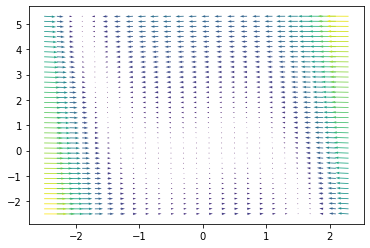

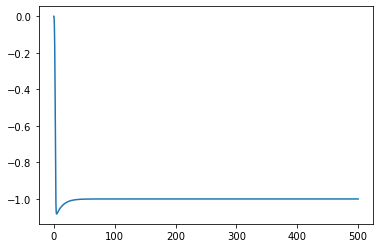

In [8]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo
import matplotlib
import networkx as nx 
import matplotlib.pyplot as plt 
import tqdm
fitzhugh_nagumo.plot_flow()
fixed_point = fitzhugh_nagumo.get_fixed_point()
plt.figure()
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[1])

# Exercise 1.1 SIR phase plane [8 points]
Now we start the real work! The module [`neurodynex3.phase_plane_analysis.fitzhugh_nagumo `](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.phase_plane_analysis.html) allows us to compute the phase plane flow of fitzhugh_nagumo equations.We are going to use it to plot the SIR model behavior.\
The SIR model can be written as follow:

$\frac{dI}{dt} = \frac{\beta}{N}SI - \gamma I$\
$\frac{dS}{dt} = - \frac{\beta}{N}SI$

1.1.1 Give an intuition behind the constants $\beta$ and $\gamma$ [2 points] (< 2 lines)

1.1.2 We often hear about the $R_0$ of an epidemy, in the SIR model $R_0 = \frac{\beta}{\gamma}$ Give an intuition behind this constant. [2 points] (< 2 lines)

1.1.3 Copy the function [`plot_flow()`](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.phase_plane_analysis.html), replace the fitzhugh nagumo model by the SIR model and plot the flow. [4 points]


your answer for 1.1.1 and 1.1.2

In [9]:
#1.3 plot flow
beta = 0.2692307692307693
gamma = 1.0/13.0
N = 100

# Exercise 1.2 SIR Trajectory [15 points]
In order to plot the trajectory of a given initial condition we use a simple [forward euler](http://web.mit.edu/10.001/Web/Course_Notes/Differential_Equations_Notes/node3.html) to solve the SIR model over time.

1.2.1 Fill the question marks in the function `get_trajectory()` below so that the function returns the trajectory $(S(t), I(t))$ from an initial point $S_0$, $I_0$.  (initial number of non infected/infected)[7 points]

1.2.2 Plot on the same graph the phase plane trajectory of an epidemy for given $R_0$s and $I_0$. [2 points]

1.2.3 Plot on the same graph the evolution on infected people over time for given $R_0$s and $I_0$. [2 points]

Flattening the curve allows to avoid high peak of infected people at the same time. Here, we want to show that acting on $R_0$ allows great flattening of the curve.

1.2.4 Add on the graph of 1.2.3 an horizontal line showing a theoretical 10% of the population hospital saturation threshold. [1 point]

1.2.5 Comment [3 points] (< 3 lines)

In [ ]:
## 1.2.1
def get_trajectory(gamma, R0, I0, N, tend=1000):
    record = {}
    record['t'] = []
    record['I'] = []
    record['S'] = []
    record['R'] = []
    beta = ???
    dt = 0.1 ## forward euler time step
    S = ???
    I = ???
    for i in range(???):
        for step in range(???):   

            record['t'] += ???
            record['I'] += ???
            record['S'] += ???
            record['R'] += ???
            dIdt = ???
            dSdt = ???
            new_S = ???
            new_I = ???
            S = ???
            I = ???
            

            
    return np.array([np.array(rec['t']),np.array(rec['S']),np.array(rec['I'])])


In [ ]:
## 1.2.2, 1.2.3 and 1.2.4
N = 1e7
I0 = 100
R0s = [10,5,5/2,5/3]

Answer of 1.2.5

# Exercise 1.3 SIR Analysis [18 points]

Now that you are a bit familiar with the SIR model, we want to do a bit of analysis over the parameters. Every action (or policies), done by a government allows to act on the $R_0$ of the model. 
- First, we want you to run trajectories for different actions of a government. We consider an action when the government acts on $R_0$ for a given time, e.g. quarantine of the population.

1.3.1 Update the `get_trajectory` function so that $R_0$ can change during the simulation (look at the modulation dictionary), now `get_trajectory` should return the maximum of the infected peak. [2 points]

1.3.2 Run the trajectories for a policy $R_0$ from $2.3$ (estimated value of $R_0$ for no actions) to $0.5$ (strong quarantine policy) and time of policy from $1$ to $200$ days. [2 points]

1.3.3 Plot the 2D matrix of maximum infected cases obtained in question 1.3.2. On the x axis we want the duration of quarantine, and $R_0$ on the y axis. Comment [2 + 3 points] (< 3 lines)

1.3.4 In question 1.3.2 we consider that people go back to their usual life at the end of the quarantine $R_0$ back to $2.3$. Now add a transition phase where people are "careful", $R_0$ of $1.5$ for 150 days, do you see any difference? [2 points] (< 1 line)

Now we study the impact of a delay in the intervention after the outbreak. In other words, we want to know how long we can wait before a government takes actions.

1.3.5  Run the trajectories for a policy $R_0$ from $2.3$ (estimated value of $R_0$ for no actions) to $0.5$ (strong quarantine policy) and time $\textbf{before we start the quarantine}$ from $1$ to $200$ days. In this question we consider a quarantine duration of 50 days. Plot the 2D matrix of maximum infected cases. On the x axis we want the time before the start of quarantine, and $R_0$ on the y axis. $\textbf{For both careful and non careful population}$.
Comment [2 + 3 points] (< 3 lines)

1.3.6 Design a government policy so that the amount of infected people never goes above 6% of the population, $\textbf{for both careful and non careful population}$ Comment. [2 points] (< 2 lines)

$\textbf{Constraints:}$ 
1. Max quarantine time 50 days with min $R_0 = 0.5$
2. For careful transition max time $100$ days and min $R_0= 1.5$. 

In [ ]:
## 1.3.1
def get_trajectory(gamma, R0, I0, N, tend=1000, modulation = ???):
    record = {}
    record['t'] = []
    record['I'] = []
    record['S'] = []
    record['R'] = []
    beta = ???
    dt = 0.1 ## forward euler time step
    S = ???
    I = ???
    for i in range(???):
        if modulation:
            ???
        for step in range(???):   

            record['t'] += ???
            record['I'] += ???
            record['S'] += ???
            record['R'] += ???
            dIdt = ???
            dSdt = ???
            new_S = ???
            new_I = ???
            S = ???
            I = ???
            

            
    return ???

In [ ]:
# 1.3.2 + 1.3.3
N =1e7
R0s = np.linspace(??,??,10)
policy_days = np.linspace(??,??,10)
I0 = 100
modulation = {}
for ?? in ??:
    for ?? in ??:
        #modulation['days'] stands for the number of days with stay in a given policy
        modulation['days'] = [100,???,1000 - ???]  ### run always 1000 time steps
        #modulation['r0'] stands for the strength of a given policy
        modulation['R0'] = [2.3,???,2.3]
        
plt.imshow(???,extent=[policy_days[0],policy_days[-1],R0s[-1],R0s[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Days of quarantine')
plt.ylabel('R0 of quarantine')
plt.colorbar()
plt.contour(days,Rs,Res,[0,0.1],linestyles = 'dashed') ## shows 10% contour
plt.show()

Answer 1.3.3

In [ ]:
# 1.3.4
N =1e7
R0s = np.linspace(??,??,10)
policy_days = np.linspace(??,??,10)

modulation = {}
for ?? in ??:
    for ?? in ??:
        #modulation['days'] stands for the number of days with stay in a given policy
        modulation['days'] = [100,???,???,1000 - ???]  ### run always 1000 time steps
        #modulation['r0'] stands for the strength of a given policy
        modulation['R0'] = [2.3,???,???,2.3]
        
plt.imshow(???,extent=[policy_days[0],policy_days[-1],R0s[-1],R0s[0]],aspect = 'auto',cmap ='seismic')
plt.xlabel('Days of quarantine')
plt.ylabel('R0 of quarantine')
plt.colorbar()
plt.contour(days,Rs,Res,[0,0.1],linestyles = 'dashed') ## shows 10% contour
plt.show()

Answer 1.3.4

In [ ]:
# 1.3.5

Answer 1.3.5

In [ ]:
# 1.3.6

Answer 1.3.6

# Exercise 1.4 Model infections with Networks [17 points]

So far we have studied a simple model of infection. This model is a simplification of propagation of an infection in a fully connected graph. We are now going to implement two types of graph and compare the results to the SIR model.
For this we need the python library [networkx](https://networkx.github.io/) and for comfort [tqdm](https://pypi.org/project/tqdm/)
(simply use pip install networkx and pip install tqdm in your terminal).

The study of the graphs allows a better understanding of the [importance of social distancing](https://corona.katapult-magazin.de/).
<div>
 <figure style="width:50%;
    float:left;
    margin:0px;
    text-align:center;
    padding:0px;" >
  <img src="https://upload.wikimedia.org/wikipedia/commons/1/13/Erdos_generated_network-p0.01.jpg">
  <figcaption >Example Erdős–Rényi graph.</figcaption>
</figure> 
 <figure style="width:50%;
    float:left;
    margin:0px;
    text-align:center;
    padding:0px;" >
  <img style="width:50%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/18-vertex_zero-symmetric_graph.svg/200px-18-vertex_zero-symmetric_graph.svg.png">
  <figcaption >Example of a K-connected graph.</figcaption>
</figure> 
   </div>

1.4.1 In the part we implement 2 different graphs:
- Erdős–Rényi graph: random connected graph, with sparsity $s$.
- random regular graph: random connected graph with $\textbf{exactly } K$ connections per neuron.

create the 2 graphs, with sparsity $s=0.1$ and $N=50$ nodes and plot it [1 point]
(keep this number of nodes more is really long to run).

In [ ]:
import tqdm
import networkx as nx 
N = 50
s = ???
G = nx.erdos_renyi_graph(??, ??)
G1 = nx.random_regular_graph(??, ??,0) 

In order to simulate the propagation of a disease we consider that at each time step we run over the infected nodes. Each infected node $n_1$ can infect a susceptible connected node $n_2$ with probability:

$P(n_2 = S\rightarrow n_2 = I|n_1 = I) = \frac{\beta \Delta_t}{N}$.

$P(n_2 = S\rightarrow n_2 = I|n_1 = S) = 0$.

Each infected node $n_1$ has the probability to be cured:

$P(n_1 = I\rightarrow n_1 = C) = \gamma$

where $I$ stands for the infected node, $S$ the susceptible nodes and $C$ the cured ones.

1.4.2 Pen&pencil. Show that for a small $\Delta_t$ and a fully connected graph with large $N$ the network behaves exactly as the SIR model. [3 points]

1.4.3 Fill the function `simulation_graph` according to the properties we defined in 1.4.2. [4 points]

1.4.4 Run the simulation for fully connected graphs (20 times and average over the trials) and show that you get quantitatively the same results as the SIR model. [3 points]

1.4.5 Run the simulation for sparsely connected graphs with $s=0.1$. Explain the differences/similarities you observed.\
Note that the scaling factor $\frac{1}{N}$ in the SIR model has to be changed if we study sparse models.
[1 + 4 points]

1.4.6 What is the difference between an Erdős–Rényi graph and a K-connected one if $N\rightarrow \infty$. Are they fully connected ? Are they sparsely connected ? [2 points] (< 2 lines)

Answer 1.4.2

In [ ]:
def simulation_graph(G,I0,R0,sparsity,tend=1000 ,modulation = False):
    dt = 0.1
    gamma = ???
    R0s= []
    average = 10 # number of run  for averaging
    arr_I = np.zeros((???,???)) #save all infection history over time for each average 
    arr_S = np.zeros((???,???)) #save all susceptible history over time for each trial 
    
    for trial in range(???):
        I_t = []
        S_t = []
        infected = ???
        susceptible = np.arange(???,???)
        susceptible = [x for x in ??? if x not in ???] # no infected in susceptible
        cured = []
        for i in tqdm.tqdm(range(tend)):
            if modulation:
                ## use code from 1.3.1
            R0s += [R0]
            beta = ??
            for i in range(???):
                tmp_infected = ???
                tmp_cured = ???
                for node in G.adj: ## run over all connections of a node
                    if node in ???:
                        for S_node in G.adj[node] :
                            if np.random.rand()< ???  and (S_node in ???):
                                tmp_infected = ???
                        if np.random.rand() < ???:
                            tmp_cured = ???
                infected  = [x for x in ??? if x not in ???]
                susceptible = [x for x in ??? if x not in ???]
                cured = ???
            
            I_t += [???]
            S_t += [???]
        arr_I[???,:] = np.array(???)
        arr_S[???,:] = np.array(???)
    
    return arr_S, arr_I

In [ ]:
#1.4.4 
I0 = 10
tend = 300

# Exercise 1.5 Non Mean field graph [17 points]

In this question we are going to design a new graph called cluster graph. We created a class cluster_Graph to allow you to have a first experience with classes in python. $\textbf{Do not hesitate to ask questions about it}$. 

1.5.1 Fill the `cluster_Graph` class so that `cluster_Graph.Matrix` returns the binary matrix of connections of a network with $C$ clusters, where the probability of connections within a cluster is $P_{intra}$ and outside $P_{extra}$. [4 points]

1.5.2 Use `cluster_Graph` to create the matrix of a graph of $N=500$ nodes and $25$ clusters with $P_{intra} = 1$ and $P_{extra} =0.02$. And create the actual graph using the networkx library and plot it. [1 point]

1.5.3 Estimate the effective sparseness of the graph [2 points]

1.5.4 Compare these results with the 2 previous graphs and the SIR model. [2 points]

1.5.5 Comment the differences/similarities, what is different in the cluster graph ? [5 points] (< 5 lines)


Note: you can convince yourself that\
$R_0^{cg} = \frac{R_0^{SIR}}{N_c P_{intra} + (N-N_c)P_{extra}} $\
where $N_c$ is the number of nodes in each cluster.

1.5.6 The last graph has a really particular topology.. Yet can you make a parallel between such a graph and hopfield networks ? [3 points] (< 3 lines)


In [ ]:
#1.5.1
class cluster_Graph:
    def __init__(self,N, clusters = 0, P_intra = 0.1, P_extra = 0.1):
        self.N = ??
        self.nodes = np.arange(??)
        self.clusters = ??
        self.P_intra = ??
        self.P_extra = ??
        if clusters > 0:
                self.c_nodes = self.nodes.copy()
                self.c_nodes = self.c_nodes.reshape(??,??)
        else:
            print(???)
        self.create_graph()
    def create_graph(self):
        self.Matrix = np.zeros((self.N,self.N))
        for i in range(??):
            for j in range(??,??):
                if  j != i:
                    if ??: # test if i and j are in the same cluster and test probability to create a link
                        self.Matrix[i,j] = self.Matrix[j,i] = 1
                    elif ??:# test if i and j are in different clusters and test probability to create a link
                        self.Matrix[i,j] = self.Matrix[j,i] = 1


Answer 1.5.3

In [ ]:
#1.5.2 and 1.5.3
N = 500
dt = 0.01
s = 0.1 
I0 = 10
tend = 300
G=nx.from_numpy_matrix(???) #create graph from binary matrix

Answer 1.5.5

Answer 1.5.6

# PART 2: Hopfield Network

## Getting Started
As a start, we are going to create a Hopfield network of 25 Neurons with 4 random patterns stored. We will then set the initial state of the network to one of the patterns with some noise and finally run the network for some iterations.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# add random patterns to the list
pattern_list = factory.create_random_pattern_list(nr_patterns=4, on_probability=0.5)
plot_tools.plot_pattern_list(pattern_list)

# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(pattern_list[0], nr_of_flips=3)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=6)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")



## Exercise 2.1: Find the maximum noise tolerance in pattern recovery [6 points]
First we need to set the hopfield network and store some patterns. 

2.1.1. Create a hopfield network with 100 neurons and store 2 random patterns. [1 points]

2.1.2. Run the network for 6 steps after setting as initial state the first of the random patterns with 3 of its bits flipped. Calculate the final overlap with all the patterns. Report if the first pattern was recalled correctly by the network. \
Note: We say that the network has correctly recalled the pattern if the last state has overlap $\geq 0.99$ with the first pattern. [1 points]

2.1.3. Next task is to plot the accuracy of the network vs number of flipped bits. The accuracy is the ratio of trials in which the network correctly recalls a pattern, after the network has been initialized with the same pattern together but with some new noise. \
Note: As you may notice every run is slightly different due to the randomization of the initial noise. You can find the accuracy if you run the same network and patterns for 100 times (with new noise in every iteration) and find the ratio of trials in which the pattern was correctly recalled. [3 points]

2.1.4. Check how fast the accuracy curve drops depending on how many patterns we have stored. What do you believe is going to happen if we increase the number of patterns? (Answer this with one or two sentences). Plot the accuracy vs number of flipped bits curve for several patterns and finally check at which number of stored patterns the accuracy becomes unstable for even one flipped bit. \
Note: The maximum number of stored patterns can vary from simulation to simulation so just give an interval of $\pm 3$ patterns. [1 points] 

In [ ]:
## 2.1.1
%matplotlib inline
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 10
number_of_patterns = 2

# create an instance of the class HopfieldNetwork
??? # put your code here

# Create the random patterns 
??? # put your code here
# instantiate a pattern factory

# Update the weights so the hopfield learns the patterns
??? # put your code here


In [ ]:
## 2.1.2
# Create a noisy version of a pattern and use that to initialize the network
??? # put your code here

# From this initial state, let the network dynamics evolve.
??? # put your code here

# Calculate the overlap and print if you have a recall
??? # put your code here (You can use the method compute_overlap_list from module pattern_tools)


if ???:
    print('Predicted Correct')

In [ ]:
## 2.1.3
import matplotlib.pyplot as plt

# Create a function that has as input the hopfield network, the number of simulation repetitions 
# and the patterns and returns a list with an array with the number of flipped bits and the 
# the corresponding accuracy for that particular "noise level" (# flipped bits)
def accuracy_vs_flipped(hopfield_net, simulation_repetitions, pattern_list):
    nr_of_flips = np.arange(hopfield_net.nrOfNeurons)
    accuracy = np.zeros_like(nr_of_flips) * 1.
    for flip in nr_of_flips:
        for sim in range(simulation_repetitions):
            
            # Create noise pattern and initialize network with it
            ??? # put your code here

            
            # from this initial state, let the network dynamics evolve.
            ??? # put your code here

        accuracy[flip] = ???
    return nr_of_flips, accuracy

simulation_runs = 100
nr_of_flipped, accuracy = accuracy_vs_flipped(hopfield_net, simulation_runs, pattern_list)
# Plot the result


Answer 2.1.4

In [ ]:
## 2.1.4 
# TODO
patterns_stored = [1, 2, ???, ???, ???, ???, 100]
for pat in patterns_stored:
    # Create new patterns and store them in hopfield_net
    ??? # put your code here
    
    nr_of_flipped, accuracy = accuracy_vs_flipped(hopfield_net, simulation_runs, pattern_list)
    
    # Plot the result


# Hopfield Network Capacity [19 points]
In this part of the miniproject we will simulate the Hopfield network and numerically estimate its memory capacity with three different types of stimuli: non-random patterns, balanced random patterns (50% activity), and low-activity random patterns.

## Exercise 2.2: Capacity for non-random patterns: Alphabet [6 points]
We will use patterns in the shape of letters to exemplify non-random patterns. First we load 10 letters and create a list with all patterns.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

# the letters we want to store in the hopfield network
letter_list = ['A', 'Z', 'S', 'X', 'O', 'H', 'P', 'W', 'M', 'K', 'B']
M = len(letter_list)

# create a list using Python's list comprehension syntax
abc_dictionary = pattern_tools.load_alphabet()
pattern_list = [abc_dictionary[key] for key in letter_list]
plot_tools.plot_pattern_list(pattern_list)

# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
N = pattern_shape[0]*pattern_shape[1]

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons=N)

Now evaluate the capacity of the network. The capacity is defined as $C = \frac{M_{max}}{N}$, where $M_{max}$ is the maximum number of patterns that can be stored and correctly retrieved. To estimate the capacity, you must complete the following steps:

2.2.1. Complete the code for the function ``get_capacity``. This function should return a vector $\mathbf{c} \in \mathbb{R}^M$ where each element $c_i$ ($i=1,2, \dotsc, M$) is the number of of patterns retrieved correctly after first loading $i$ patterns into the network. [4 points]

  To determine if a pattern $\mu$ can be correctly retrieved:
   
  2.2.1.a. initialize the network in $\mu$ with a little noise (1%)
  
  2.2.1.b. run the network dynamics a few steps (3 steps)
  
  2.2.1.c. calculate the overlap between the last state of the network and pattern $\mu$
  
  2.2.1.d. if the overlap is $\geq 0.9$, we consider the pattern to have been correctly retrieved.


2.2.2. Plot the number of successfully retrieved patterns as a function of the number of loaded patterns. [1 points]

2.2.3. Using the plot in 2.2.2., calculate the capacity $C$. [1 points]

In [ ]:
# 2.2.1
def get_capacity(???):
    c = np.zeros((M,))

    ??? # put your code here
            
    return c

In [ ]:
# 2.2.2 and 2.2.3
capacity = get_capacity(???)
M_max = ???
C = M_max/N

# plot
fig, ax = plt.subplots()
ax.plot(np.arange(1,M+1), capacity)
ax.set_xlabel('number of patterns stored')
ax.set_ylabel('number of patterns retrieved')
ax.set_title('C = {}'.format(C))

## Exercise 2.3: Capacity for balanced random patterns [2 points]
We will now evaluate the capacity of the network with random patterns with 50% activity. As in the previous case, create a list of all patterns, and then evaluate the capacity with the function ``get_capacity`` (you can use exactly the same function that you defined above).

2.3.1 Plot the number of successfully retrieved patterns vs the number of stored patterns. [1 points]

2.3.2 Calculate $C$. [1 points]

In [ ]:
# 2.3
# create a list of patterns
M = ???
pattern_list = ???

# calculate capacity
capacity = get_capacity(???)
M_max = ???
C = M_max/N

# plot
fig, ax = plt.subplots()
ax.plot(np.arange(1,M+1), capacity)
ax.set_xlabel('number of patterns stored')
ax.set_ylabel('number of patterns retrieved')
ax.set_title('C = {}'.format(C))

## Exercise 2.4: Capacity for low-activity random patterns [11 points]
We now continue by evaluating the capacity of a Hopfield network with low-activity random patterns. To do this, we will diverge slightly from the textbook and use the Hopfield model proposed in the paper by [Tsodyks and Feigel'man (1988)](https://doi.org/10.1209/0295-5075/6/2/002). Given a neuron state $S_i \in \{ -1, 1 \}$, we first define the 0,1-state of the neuron $\sigma_i \in \{ 0, 1 \}$ as
    \begin{equation}
    \sigma_i = \frac{S_i + 1}{2}
    \end{equation}
and the state update function as
    \begin{equation}
    S_i(t+1) = \mathrm{sign} \left( \displaystyle \sum_j^N w_{ij} \sigma_j(t) - \theta \right)
    \end{equation}
where $w_{ij}$ are the synaptic weights and $\theta$ is the neural "firing threshold". Synaptic weights are set according to
    \begin{equation}
    w_{ij} = \frac{1}{a (1-a) N} \displaystyle \sum_\mu^M (\xi_i^\mu - a) (\xi_j^\mu - a)
    \end{equation}
where the patterns $\xi_i^\mu \in \{ 0, 1 \}$ have a probability $a$ of being 1 (this is called the activity or sparseness). This is essentially the regular Hebbian learning rule adjusted for the activity. In this setting, the overlap between the network state and a pattern $\xi_i^\mu$ is calculated as
    \begin{equation}
    m^\mu = \frac{1}{a (1-a) N} \displaystyle \sum_i^N (\xi_i^\mu - a) \sigma_i
    \end{equation}
    
To simulate the low-activity Hopfield network, you must complete the following steps:

2.4.1. Complete the code for the new state update function called ``sparse_update_function``. This function must perform the calculation in the second equation above (+1 for numpy implementation). [1 + 1 points]

2.4.2. Complete the code for the new weight learning function called ``calculate_sparse_weights``. This function must perform the calculation in the third equation above (+1 for numpy implementation). [1 + 1 points]

2.4.3. Complete the code for the new overlap function called ``calculate_sparse_overlap``. This function must perform the calculation in the third equation above (+1 for numpy implementation). [1 + 1 points]

2.4.4. Complete the ``get_sparse_capacity`` function to use the new update function, new weight learning rule and the new overlap function. This function should return a vector $\mathbf{c} \in \mathbb{R}^M$ where each element $c_i$ ($i=1,2, \dotsc, M$) is the number of patterns retrieved correctly after first loading $i$ patterns into the network. [2 points]

**Hint 1:** *The calculations in the equations above can be performed using dot products and outer products at the right places. First figure out how to do this, and then use the ``Numpy`` functions ``dot()`` and ``outer()``. This is much faster than looping through arrays.*

**Hint 2:** *To tell the network to use a new state update function, write ``hopfield_net.set_dynamics_to_user_function(update_function=sparse_update_function)``.*

Next, you need to estimate the capacity of the low-activity Hopfield network. To do this, you first need to optimize the threshold parameter $\theta$, i.e. find the $\theta$ that maximizes the storage capacity.

2.4.5. Set $a=0.5$ and calculate the capacity $C$ like in the previous exercise for various threshold values $-1 \leq \theta \leq 1 $. Plot $C$ vs $\theta$. Which $\theta$ maximizes the capacity? [1 points]

2.4.6. Now set the activity to $a=0.1$ and then $a=0.05$. Perform step 4 for both these cases. How does the capacity $C$ of the low-activity networks compare to the balanced case of $a=0.5$? [2 points]

In [ ]:
# 2.4.1

def sparse_update_function(S0, weights):
    
    ??? # put your code here
    
    return S1


In [ ]:
# 2.4.2
def calculate_sparse_weights(pattern_list, a):
    
    ??? # put yourcode here
    
    return weight_matrix


In [ ]:
# 2.4.3
def calculate_sparse_overlap(S, pattern, a):
    
    ??? # put your code here
    
    return overlap

In [ ]:
# 2.4.4
def get_sparse_capacity(???):
    
    ??? # put your code here
            
    return c


In [ ]:
# 2.4.5 and 2.4.6
N = 100
a_vec = np.array([0.5, 0.1, 0.05])

??? # put your code here

# plot
fig, ax = plt.subplots()
ax.plot(theta_vec, C_vec.T)
ax.set_xlabel('neuronal threshold')
ax.set_ylabel('capacity')
ax.legend(a_vec)

Answer 2.4.6.